In [1]:
# Step 1: Data Loading
import pandas as pd

In [2]:
# Load the dataset from a CSV file
data_path = "healthcare_dataset.csv"
healthcare_data = pd.read_csv(data_path)


In [3]:
# Step 2: Data Processing and Cleaning

# Convert 'Date of Admission' and 'Discharge Date' from object to datetime type
healthcare_data['Date of Admission'] = pd.to_datetime(healthcare_data['Date of Admission'])
healthcare_data['Discharge Date'] = pd.to_datetime(healthcare_data['Discharge Date'])


In [4]:
# Handle missing data (the previous inspection showed no missing data, but we include handling as a precaution)
# Check for missing values in each column
missing_data = healthcare_data.isnull().sum()
print("Missing data in each column:\n", missing_data)


Missing data in each column:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [5]:
# Assuming no action needed if no missing data found; otherwise, you could use:
# healthcare_data.fillna(method='ffill', inplace=True)  # Forward fill method

In [6]:
# Encoding categorical variables using one-hot encoding
categorical_vars = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital',
                    'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
healthcare_data_encoded = pd.get_dummies(healthcare_data, columns=categorical_vars)

In [7]:
# Feature Engineering
# Calculate the length of hospital stay in days
healthcare_data['Length of Stay'] = (healthcare_data['Discharge Date'] - healthcare_data['Date of Admission']).dt.days

In [8]:
# Display the processed and cleaned data structure and a sample
print("Processed and cleaned data sample:")
print(healthcare_data_encoded.head())

Processed and cleaned data sample:
                  Name  Age Date of Admission  Billing Amount  Room Number  \
0      Tiffany Ramirez   81        2022-11-17    37490.983364          146   
1          Ruben Burns   35        2023-06-01    47304.064845          404   
2            Chad Byrd   61        2019-01-09    36874.896997          292   
3    Antonio Frederick   49        2020-05-02    23303.322092          480   
4  Mrs. Brandy Flowers   51        2021-07-09    18086.344184          477   

  Discharge Date  Gender_Female  Gender_Male  Blood Type_A+  Blood Type_A-  \
0     2022-12-01           True        False          False          False   
1     2023-06-15          False         True          False          False   
2     2019-02-08          False         True          False          False   
3     2020-05-03          False         True          False          False   
4     2021-08-02          False         True          False          False   

   ...  Admission Type_Emer

In [17]:
# Step 3: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
# Summary statistics for numerical columns
print("Summary Statistics:\n", healthcare_data.describe())

Summary Statistics:
                 Age              Date of Admission  Billing Amount  \
count  10000.000000                          10000    10000.000000   
mean      51.452200  2021-05-01 21:53:25.439999744    25516.806778   
min       18.000000            2018-10-30 00:00:00     1000.180837   
25%       35.000000            2020-02-10 00:00:00    13506.523967   
50%       52.000000            2021-05-02 00:00:00    25258.112566   
75%       68.000000            2022-07-23 06:00:00    37733.913727   
max       85.000000            2023-10-30 00:00:00    49995.902283   
std       19.588974                            NaN    14067.292709   

        Room Number              Discharge Date  Length of Stay  
count  10000.000000                       10000    10000.000000  
mean     300.082000  2021-05-17 11:22:24.960000       15.561800  
min      101.000000         2018-11-01 00:00:00        1.000000  
25%      199.000000         2020-02-23 18:00:00        8.000000  
50%      299.00000

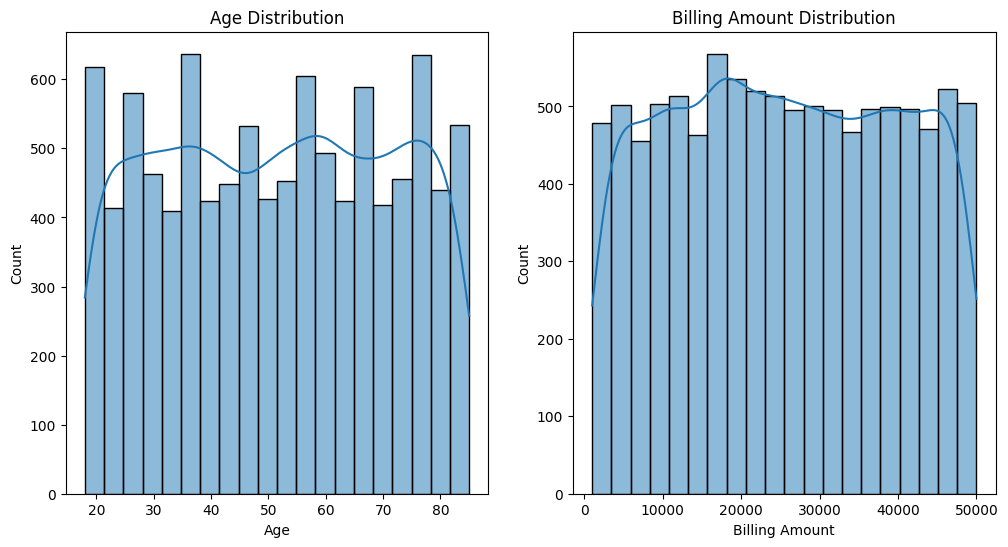

In [11]:
# Histograms for age and billing amount
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(healthcare_data['Age'], bins=20, ax=ax[0], kde=True)
ax[0].set_title('Age Distribution')
sns.histplot(healthcare_data['Billing Amount'], bins=20, ax=ax[1], kde=True)
ax[1].set_title('Billing Amount Distribution')
plt.show()

In [13]:
# Load the dataset
data_path = "healthcare_dataset.csv"
healthcare_data = pd.read_csv(data_path)

In [14]:
# Convert 'Date of Admission' and 'Discharge Date' from object to datetime type
healthcare_data['Date of Admission'] = pd.to_datetime(healthcare_data['Date of Admission'])
healthcare_data['Discharge Date'] = pd.to_datetime(healthcare_data['Discharge Date'])

In [15]:
# Encoding categorical variables using one-hot encoding
categorical_vars = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital',
                    'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
healthcare_data_encoded = pd.get_dummies(healthcare_data, columns=categorical_vars)

In [18]:
# Ensure only numeric data is included for the correlation matrix
numeric_data = healthcare_data_encoded.select_dtypes(include=[np.number])


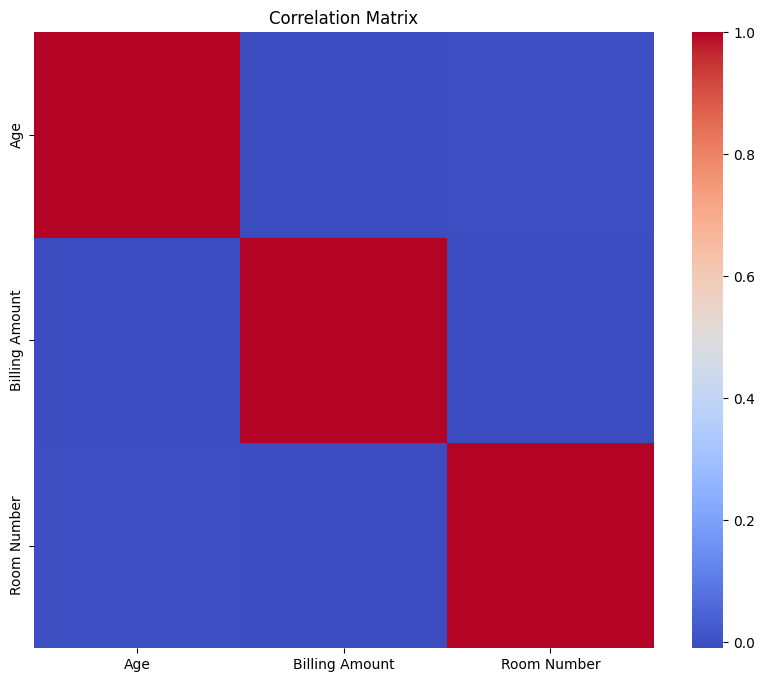

In [21]:
# Generate the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Step 4: Modeling Preparation
from sklearn.model_selection import train_test_split

In [26]:
# Ensure all data is numeric by converting any remaining non-numeric columns
healthcare_data_encoded = pd.get_dummies(healthcare_data)

In [27]:
# Check for and handle any infinite or NaN values
healthcare_data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
healthcare_data_encoded.dropna(inplace=True)

In [28]:
# Define the independent variables (drop non-numeric and target variable)
X = healthcare_data_encoded.drop(['Billing Amount', 'Name', 'Date of Admission', 'Discharge Date', 'Doctor', 'Hospital', 'Insurance Provider'], axis=1, errors='ignore')
y = healthcare_data_encoded['Billing Amount']

In [1]:
# Step 5: Regression Analysis
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and prepare the dataset
data_path = "healthcare_dataset.csv"
healthcare_data = pd.read_csv(data_path)

In [3]:
# Convert date columns to datetime
healthcare_data['Date of Admission'] = pd.to_datetime(healthcare_data['Date of Admission'])
healthcare_data['Discharge Date'] = pd.to_datetime(healthcare_data['Discharge Date'])


In [4]:
# One-hot encoding of categorical variables
healthcare_data_encoded = pd.get_dummies(healthcare_data, columns=[
    'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 
    'Insurance Provider', 'Admission Type', 'Medication', 'Test Results'
])

In [5]:
# Replace inf/-inf with NaN and drop any rows with NaN values
healthcare_data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
healthcare_data_encoded.dropna(inplace=True)


In [6]:
# Feature engineering: Calculate length of hospital stay
healthcare_data['Length of Stay'] = (healthcare_data['Discharge Date'] - healthcare_data['Date of Admission']).dt.days


In [7]:
# Prepare features and target for regression
X = healthcare_data_encoded.drop(['Billing Amount', 'Name', 'Date of Admission', 'Discharge Date', 'Doctor', 'Hospital', 'Insurance Provider'], axis=1, errors='ignore')
y = healthcare_data_encoded['Billing Amount']
y_class = healthcare_data_encoded['Test Results_Normal']  # This assumes 'Normal' is a column after one-hot encoding

In [8]:
# Split the data into training and testing sets for both regression models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [9]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 214997337.31266585


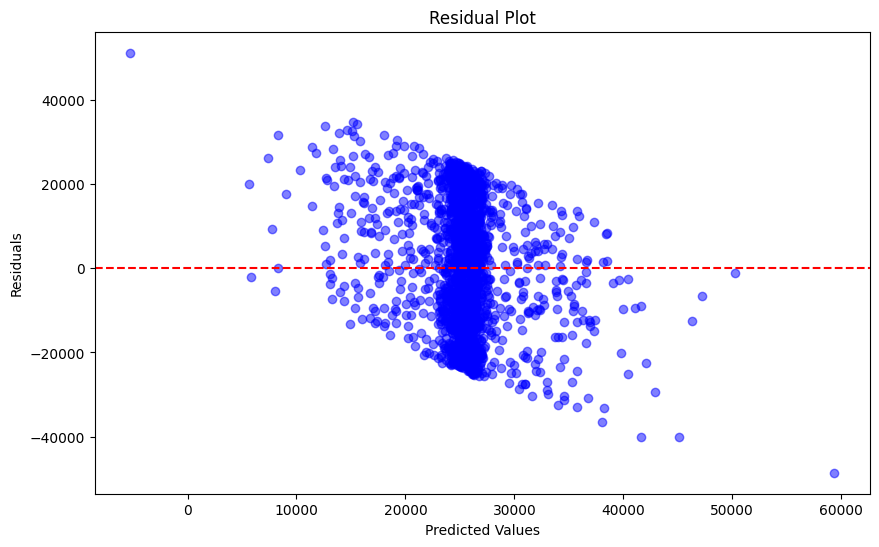

In [12]:
# Residual Plot (Linear Regression)

import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

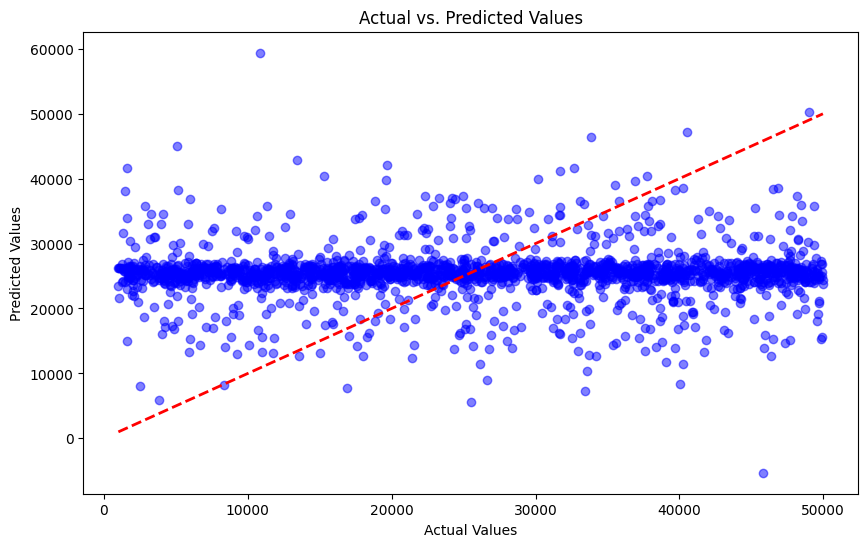

In [13]:
# Predicted vs. Actual Values Plot (Linear Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


In [10]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_class, y_train_class)
y_pred_class = logistic_model.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 1.0


In [14]:
#Summary Table of Classification Metrics (Logistic Regression)
from sklearn.metrics import classification_report

# Assuming y_test_class and y_pred_class are available from the logistic regression predictions
report = classification_report(y_test_class, y_pred_class, output_dict=True)
classification_results = pd.DataFrame(report).transpose()

# Display the classification results table
print(classification_results)


              precision  recall  f1-score  support
False               1.0     1.0       1.0   1342.0
True                1.0     1.0       1.0    658.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   2000.0
weighted avg        1.0     1.0       1.0   2000.0


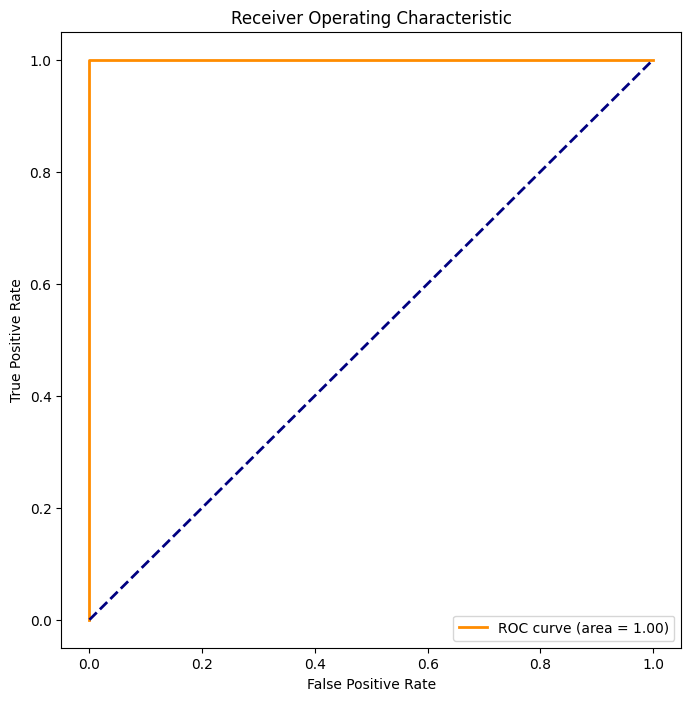

In [23]:
#ROC Curve (Logistic Regression)
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve from y_test_class and model probabilities
fpr, tpr, thresholds = roc_curve(y_test_class, logistic_model.predict_proba(X_test_class)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


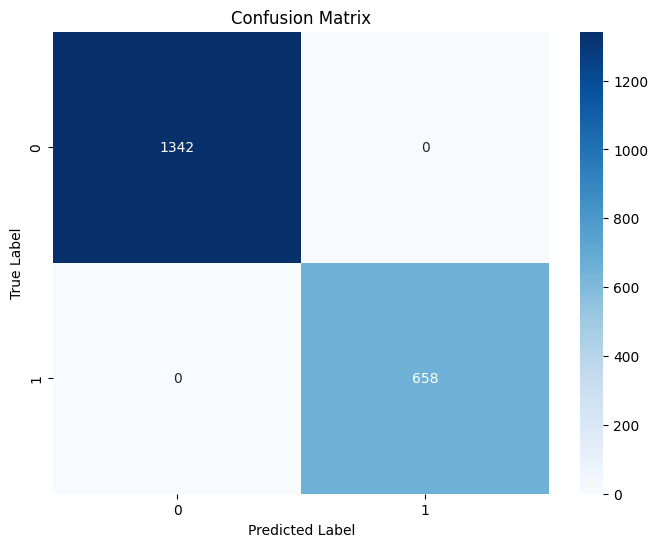

In [16]:
#  Confusion Matrix (Logistic Regression)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
